In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Normalization, Dense, InputLayer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
data=pd.read_csv('/kaggle/input/second-hand-used-cars-data-set-linear-regression/train.csv')
data[:5]

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
tData=tf.constant(data)
tData[:5]

<tf.Tensor: shape=(5, 12), dtype=float64, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, 3.000000e+00,
        7.894500e+04, 1.000000e+00, 2.000000e+00, 1.400000e+01,
        1.770000e+02, 7.300000e+01, 1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, 6.000000e+00,
        1.172200e+05, 5.000000e+00, 9.000000e+00, 9.000000e+00,
        1.480000e+02, 7.400000e+01, 9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, 2.000000e+00,
        1.325380e+05, 2.000000e+00, 8.000000e+00, 1.500000e+01,
        1.810000e+02, 5.300000e+01, 9.700000e+01, 2.153860e+05],
       [4.000000e+00, 5.739990e+05, 7.223810e+05, 4.000000e+00,
        1.010650e+05, 4.000000e+00, 3.000000e+00, 1.100000e+01,
        1.970000e+02, 5.400000e+01, 1.160000e+02, 2.442955e+05],
       [5.000000e+00, 6.913880e+05, 8.113350e+05, 6.000000e+00,
        6.155900e+04, 3.000000e+00, 9.000000e+00, 1.200000e+01,
        1.600000e+02, 5.300000e+01, 1.050000e+02, 5

In [4]:
tData=tf.random.shuffle(tData)

In [5]:
y=tData[ : , -1]
X=tData[ : , 3:-1]


In [6]:
normalizer=Normalization()
normalizer.adapt(X)
nData=normalizer(X)

In [7]:
nData[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.4194925 , -0.24040508, -0.7046619 , -0.20970294,  0.16820416,
         1.3023156 ,  0.21719798, -0.16262706],
       [ 0.8374947 ,  1.6107831 ,  0.00855922, -0.56393147,  1.0652931 ,
         1.3541863 ,  0.65607935,  0.5500235 ],
       [ 0.8374947 , -1.5824274 ,  0.00855922, -1.2723885 ,  0.16820416,
         1.250445  ,  0.8511377 ,  0.35998335],
       [ 1.4194925 ,  0.09845544, -0.7046619 , -1.2723885 ,  0.16820416,
        -0.6168977 ,  1.290019  ,  0.6450436 ],
       [ 1.4194925 , -1.1637683 ,  1.4350015 , -0.56393147,  1.5138375 ,
        -1.0318627 , -1.2457398 , -1.4929081 ]], dtype=float32)>

In [8]:
X_train=nData[:int(len(nData)*0.8)]
y_train=y[:int(len(nData)*0.8)]
X_test=nData[:int(len(nData)*0.2)]
y_test=y[:int(len(nData)*0.2)]

In [9]:
model=Sequential([
    InputLayer(input_shape=(8,)),
    Dense(128, activation='relu'),
    Dense(1)
])

In [10]:
model.compile(optimizer=Adam(learning_rate=0.1), loss = MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [11]:
model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 314161.0625 - root_mean_squared_error: 339413.2812 - val_loss: 288181.9375 - val_root_mean_squared_error: 312003.1875
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 312492.6250 - root_mean_squared_error: 337814.4062 - val_loss: 285532.9062 - val_root_mean_squared_error: 309414.0312
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 308157.3125 - root_mean_squared_error: 333687.1250 - val_loss: 280072.7188 - val_root_mean_squared_error: 304044.8438
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 300359.4062 - root_mean_squared_error: 326179.3750 - val_loss: 271324.9688 - val_root_mean_squared_error: 295474.0625
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 288818.8125 - root_mean_squared_error: 315180.2500 - val_loss: 259160.5469 - val_root_mean_squared_error: 283587.0312
Epoch 6/100
20/20 [=========================

In [12]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 32657.7422 - root_mean_squared_error: 39902.2656


[32657.7421875, 39902.265625]

In [13]:
pred = model.predict(X_test)

7/7 [==============================] - 0s 1ms/step


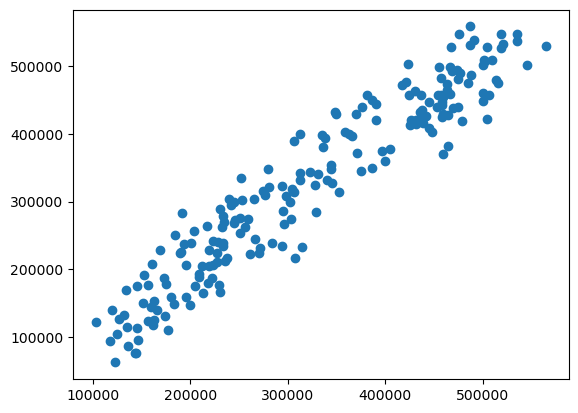

In [14]:
plt.scatter(pred,y_test)